In [29]:
import networkx as nx
import seaborn as sns
from pathlib import Path
import torch
from DQN import DQN_agent_modular
from envs.GraphEnv.impnode import ImpnodeEnv
from DQN.train_dqn import train_dqn, fill_memory
from DQN.finetune_dqn import finetune_dqn, finetune_dqn_eps
from DQN.test_and_compare import test_loop, hda
import matplotlib.pyplot as plt
import time
import  numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import random

seed = 412
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.use_deterministic_algorithms(True,warn_only=True)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

RESULTS_BASEPATH_TEST1 = 'results\good\cuda_0.001_4000_1000_0.99_128_1500_300_1.0_0.05_300_0.001_4_2_32_64_1_3_(30, 50)_dw_nd_barabasi_albert_20240407152655'
# RESULTS_BASEPATH_TEST1 = "results/hyp_search/cuda_0.001_3000_500_0.99_64_1500_100_1.0_0.05_100_0.001_4_2_32_64_1_3_(30, 50)_4_dw_nd_4_None"

In [32]:
# variables for training the agent

num_train_eps = 10000 
num_mem_fill_eps = 50 
discount = 0.99 
batch_size = 64
mem_capacity = 50000 
update_frequency = 300 
eps_max = 0.1
eps_min = 0.05 
eps_step = 300 
lr = 0.0002
alpha = 0.001
gnn_depth=4
state_size=2
hidden_size1=32
hidden_size2=64
action_size=1
n_step=3
unfrozen_layers = ['linear5','dense1','dense2']

num_nodes = (30, 50)
anc = 'dw_nd'
max_removed_nodes=None

In [33]:
# create the dqn_agent
dqn_agent_train = DQN_agent_modular.DQNAgent(device,
                                             alpha=alpha,
                                             gnn_depth=gnn_depth,
                                             state_size=state_size,
                                             hidden_size1=hidden_size1,
                                             hidden_size2=hidden_size2,
                                             action_size=action_size,
                                             discount=discount,
                                             eps_max=eps_max,
                                             eps_min=eps_min,
                                             eps_step=eps_step,
                                             memory_capacity=mem_capacity,
                                             lr=lr,
                                             mode='finetune',
                                             unfrozen_layers = unfrozen_layers
                                             )
dqn_agent_train.load_model('{}/model.pt'.format(RESULTS_BASEPATH_TEST1))
#dqn_agent_train.save_model('{}_finetune/model.pt'.format(RESULTS_BASEPATH_TEST1))

linear1 is frozen
linear2 is unfrozen
linear3 is unfrozen
linear4 is unfrozen
sum_agg is frozen
linear5 is unfrozen
dense1 is unfrozen
dense2 is unfrozen


In [34]:
subdir = 'data/cm/WS_degree'
data_path = Path.cwd() / subdir

env_train = ImpnodeEnv(anc=anc, 
                       g_type='barabasi_albert', 
                       num_nodes=num_nodes, 
                       mode='finetune',
                       data_path=data_path,
                       max_removed_nodes=max_removed_nodes
                       )

val_data_path = 'data/cm/WS_degree_val'
val_data_path = Path.cwd()/val_data_path

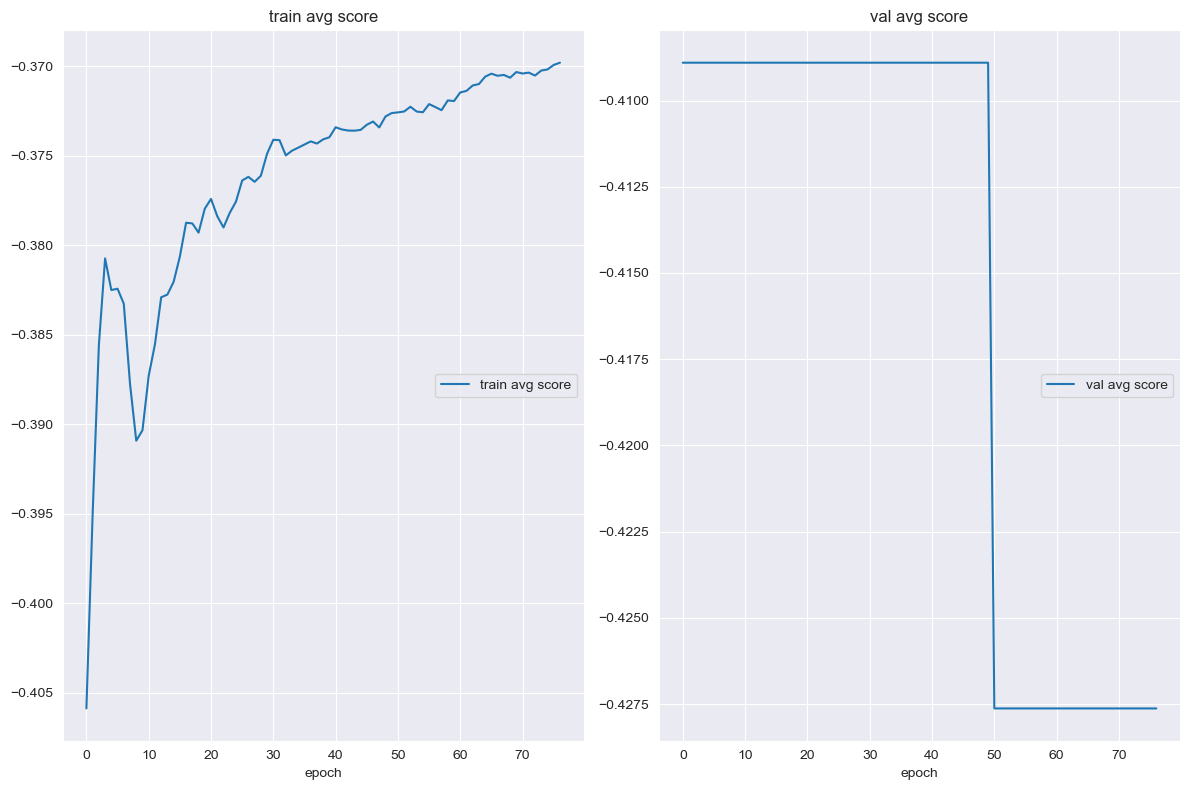

train avg score
	train avg score  	 (min:   -0.406, max:   -0.370, cur:   -0.370)
val avg score
	val avg score    	 (min:   -0.428, max:   -0.409, cur:   -0.428)


KeyboardInterrupt: 

In [35]:
model_name = 'ws_{}_{}'.format(time.strftime("%Y%m%d%H%M%S"),unfrozen_layers)
finetune_dqn_eps(env_train, dqn_agent_train, RESULTS_BASEPATH_TEST1, num_train_eps, num_mem_fill_eps, n_step, batch_size, update_frequency, val_data_path, model_name, val_step=50)

print('Finished')
print(model_name)